# Data Exploration

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Assignment1dataset22.csv',header='infer')
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,label
0,0,0,0,0,0,0,0,70194,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,70193,0,0,0,0,13,0,0
2,0,0,0,0,0,0,0,70192,8153,0,0,0,5,1,0
3,0,0,0,0,0,0,0,70191,420,0,0,0,30,1,0
4,0,0,0,0,0,0,0,70190,2251,0,0,0,3,1,0


In [87]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70194 entries, 0 to 70193
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X0      70194 non-null  int64
 1   X1      70194 non-null  int64
 2   X2      70194 non-null  int64
 3   X3      70194 non-null  int64
 4   X4      70194 non-null  int64
 5   X5      70194 non-null  int64
 6   X6      70194 non-null  int64
 7   X7      70194 non-null  int64
 8   X8      70194 non-null  int64
 9   X9      70194 non-null  int64
 10  X10     70194 non-null  int64
 11  X11     70194 non-null  int64
 12  X12     70194 non-null  int64
 13  X13     70194 non-null  int64
 14  label   70194 non-null  int64
dtypes: int64(15)
memory usage: 8.0 MB
None


In [151]:
data['label'].value_counts()
print("The dataset has", data.shape[0], "samples and", data.shape[1]-1, "features")
missing_values = data.isnull().sum().any()
print ('Are there missing values?', missing_values)
print("Are there duplicated instances?'", data.iloc[:,3:].duplicated().sum().any())

onlyNumeric = data.select_dtypes(include=np.number)
noLabel = onlyNumeric.drop(['label'],axis=1)
feature_names=noLabel.columns 

The dataset has 70194 samples and 14 features
Are there missing values? False
Are there duplicated instances?' False


In [89]:
data.describe(include='all')

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,label
count,70194.00000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,7.019400e+04,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000
mean,0.00057,0.002764,0.486338,0.001966,0.001952,0.539961,0.020899,35097.500000,4.124542e+03,0.001382,160.100621,0.012323,32.316437,0.675656,0.050204
std,0.02503,0.101522,32.071616,0.060359,0.044136,32.683800,0.631882,20263.406735,6.411336e+04,0.050761,1272.409804,0.110324,81.800379,0.468133,0.218367
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17549.250000,6.700000e+01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35097.500000,3.370000e+02,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52645.750000,1.875000e+03,0.000000,0.000000,0.000000,16.000000,1.000000,0.000000
max,2.00000,8.000000,7479.000000,2.000000,1.000000,7468.000000,43.000000,70194.000000,7.028652e+06,4.000000,40504.000000,1.000000,511.000000,1.000000,1.000000


In [152]:
cols=[]
for col in data.columns:
    if data[col].nunique() == data.shape[0]:
        print(col, "has as many unique values as instances in the dataset: it will not help with prediction therefore it can be dropped")
        cols.append(col)

X7 has as many unique values as instances in the dataset: it will not help with prediction therefore it can be dropped


#    Data Visualization

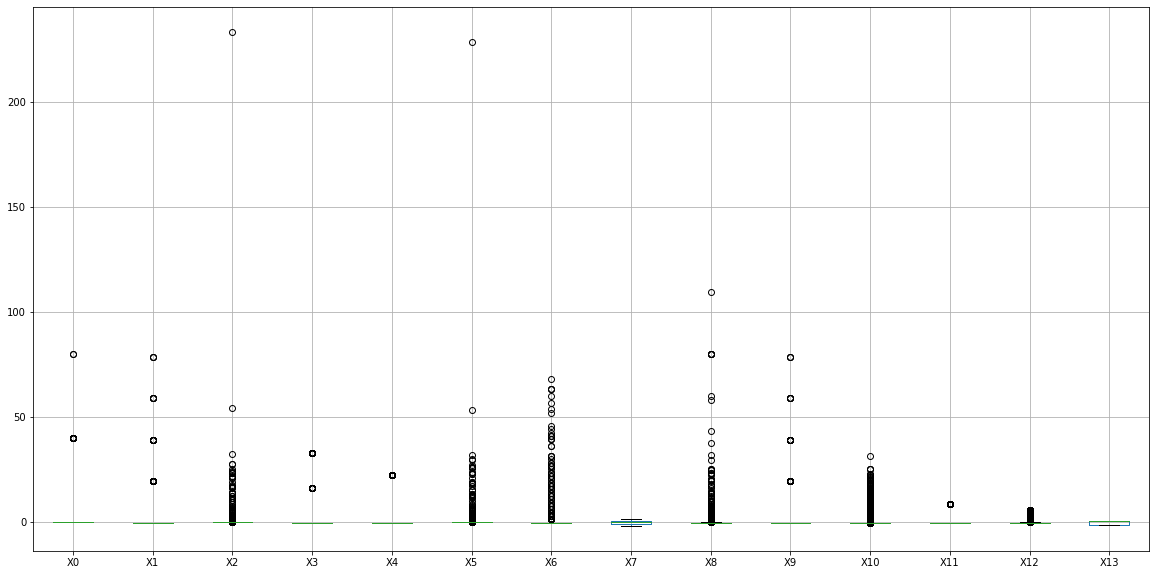

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(noLabel)
scaled_data = scaler.transform(noLabel) 
data= pd.DataFrame(data=scaled_data, columns = feature_names)
data.boxplot(figsize=(20,10))
plt.show()

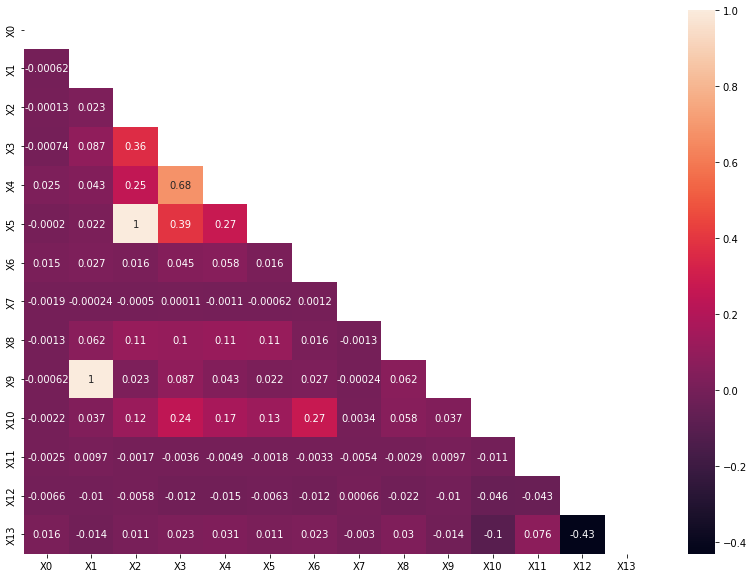

In [80]:
plt.figure(figsize=(14, 10))
hm = sns.heatmap(noLabel.corr(), annot=True, mask=np.triu(noLabel.corr()))
plt.show()

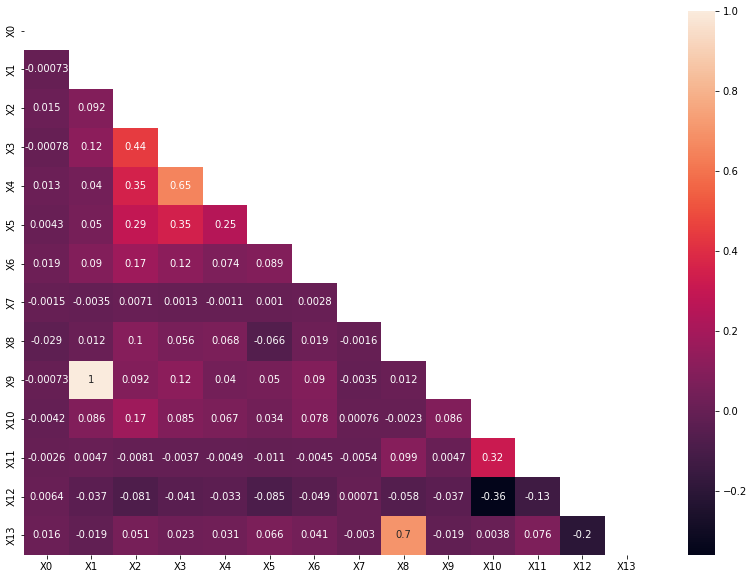

In [159]:
plt.figure(figsize=(14, 10))
corr = noLabel.corr(method = 'spearman')
hm = sns.heatmap(corr, annot=True, mask=np.triu(corr))
plt.show()

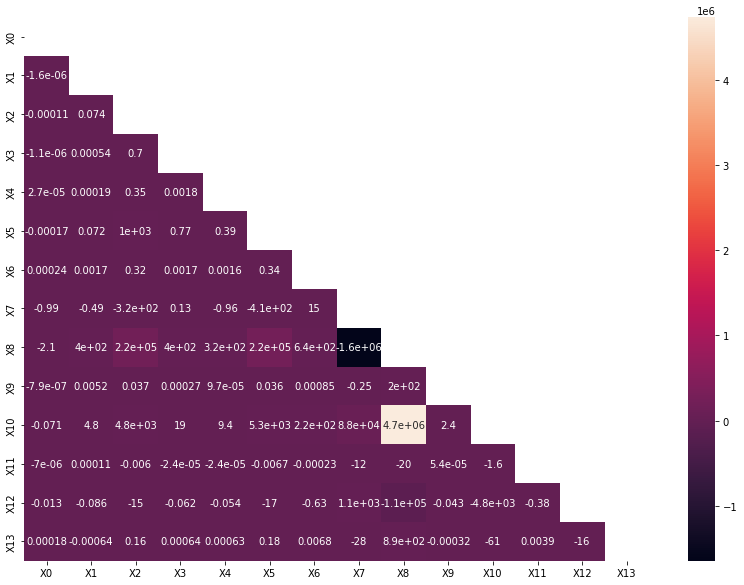

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
X0,6.265184e-04,-0.000002,-0.000106,-0.000001,0.000027,-0.000165,0.000245,-9.881897e-01,-2.082782e+00,-7.874771e-07,-7.134650e-02,-0.000007,-0.013430,0.000185
X1,-1.574954e-06,0.010307,0.074076,0.000536,0.000194,0.071592,0.001709,-4.905760e-01,4.041523e+02,5.153390e-03,4.838694e+00,0.000108,-0.086068,-0.000642
X2,-1.061860e-04,0.074076,1028.588569,0.703302,0.351849,1047.012135,0.322348,-3.249833e+02,2.207439e+05,3.703824e-02,4.840560e+03,-0.005993,-15.107639,0.157743
X3,-1.120328e-06,0.000536,0.703302,0.003643,0.001805,0.772719,0.001711,1.331187e-01,4.003818e+02,2.679655e-04,1.865004e+01,-0.000024,-0.061511,0.000638
X4,2.738066e-05,0.000194,0.351849,0.001805,0.001948,0.388002,0.001612,-9.625817e-01,3.195389e+02,9.702793e-05,9.364883e+00,-0.000024,-0.053928,0.000633
X5,-1.652362e-04,0.071592,1047.012135,0.772719,0.388002,1068.230798,0.335260,-4.136677e+02,2.249153e+05,3.579593e-02,5.258871e+03,-0.006654,-16.814947,0.175135
X6,2.445263e-04,0.001709,0.322348,0.001711,0.001612,0.335260,0.399275,1.537762e+01,6.446877e+02,8.543982e-04,2.191316e+02,-0.000229,-0.628442,0.006750
X7,-9.881897e-01,-0.490576,-324.983275,0.133119,-0.962582,-413.667702,15.377623,4.106057e+08,-1.644308e+06,-2.452880e-01,8.751594e+04,-12.166491,1096.815993,-28.486437
X8,-2.082782e+00,404.152334,220743.949840,400.381764,319.538867,224915.306008,644.687723,-1.644308e+06,4.110523e+09,2.020762e+02,4.733821e+06,-20.432752,-113270.449011,889.763544
X9,-7.874771e-07,0.005153,0.037038,0.000268,0.000097,0.035796,0.000854,-2.452880e-01,2.020762e+02,2.576695e-03,2.419347e+00,0.000054,-0.043034,-0.000321


In [38]:
plt.figure(figsize=(14, 10))
hm = sns.heatmap(noLabel.cov(), annot=True, mask=np.triu(noLabel.cov()))
plt.show()
noLabel.cov()

In [156]:
def find_outliers(feature):   

    # finding the 1st quartile
    q1 = np.quantile(feature, 0.25)
    # finding the 3rd quartile
    q3 = np.quantile(feature, 0.75)

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    
    #print(iqr, upper_bound, lower_bound)
    
    outliers = feature[(feature < lower_bound) | (feature > upper_bound)]
    print("outliers", outliers)
          
    print("Number of boxplot anomalies:", len(outliers),"\nPercentage",100*len(outliers)/len(feature),"\n")
    return outliers

for (columnName, columnData) in noLabel.iteritems():
    print('Column Name : ', columnName)
    #print('Column Contents : ', columnData.values)
    outliers = find_outliers(noLabel[columnName].to_numpy())

    

Column Name :  X0
outliers [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
Number of boxplot anomalies: 38 
Percentage 0.05413568111234578 

Column Name :  X1
outliers [4 2 2 4 2 2 6 2 2 2 8 2 2 2 2 2 4 2 2 6 2 2 2 2 6 8 2 2 2 2 8 2 2 4 2 2 2
 6 2 2 4 4 2 2 2 2 2 6 2 2 2 2 2 2 2 2 2 4 4 2 2 4 2 2 2 2 2 2 2]
Number of boxplot anomalies: 69 
Percentage 0.09829899991452261 

Column Name :  X2
outliers [   3    2   19    5    2    1    4    2    1    1    2    3    2    5
    1  107  462    2    2    2  110    1    1    6    2  151    1    2
    7   31    1    6    9    4    2    3    1    1    4  157   13    1
    1    5    5    2  558    1    2    2   12    1    1    4    4    3
   12  371    7    2    4    2    6    4    1    6  151  217   83    1
    3  193    6    2  789    2  520    6    2    4    4  884    6    2
  457    3    1    1    3  767    9    2    2    2    1    2    3    6
  756    2    6    2    2    1    1   21    1   10  281    6    1    1

outliers []
Number of boxplot anomalies: 0 
Percentage 0.0 



In [ ]:
Q1 = noLabel.quantile(0.25)
Q3 = noLabel.quantile(0.75)
IQR = Q3 - Q1
#print(Q3)
mask = ((noLabel < (Q1 - 1.5 * IQR)) | (noLabel > (Q3 + 1.5 * IQR)))

for (columnName, columnData) in mask.iteritems():
    print('Column Name : ', columnName)
    data= pd.Series(columnData.values)
    print( data.value_counts())
    print(onlyNumeric.loc[data,'label'].value_counts())
    

# Feature selection

Dropping X7 as it is a column with IDs, as many different values as the number of rows of the dataset

In [ ]:
smallerDataSet = onlyNumeric.drop(['X7'],axis=1)

Based on the correlation values, X4 and X3 have moderate to strong correlation, one of them can be dropped

In [158]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
pearsonr(smallerDataSet.loc[:,'X3'],smallerDataSet.loc[:,'X4'])
spearmanr(smallerDataSet.loc[:,'X3'],smallerDataSet.loc[:,'X4'])

SpearmanrResult(correlation=0.6532465192869643, pvalue=0.0)